<a href="https://colab.research.google.com/github/Veena7580/Homework/blob/main/Week14/week14_assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 14 Programming Assignment

As you're working on identifying data for your final project, it's helpful to spend some time exploring your various data files.  For this week's assignment, I'd like you to take a few of the ideas from the the lectures, review assignment, and tonight's lecture to start exploring the data you plan to use for the final project.

For the following activities, you can use just one of the data files that you've identified, or you can do the activities using different data files.  That's up to you.  Please describe what you're doing in a Markdown cell or in the comments of your code.  When you've completed the assignment, submit it as normal.

### 1. Basic Statistics

Use Python to read in your data file and show many rows and columns your data has.

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

# Load the dataset
df = pd.read_csv('Healthcare-Diabetes.csv')

# Get the number of rows and columns
num_rows, num_columns = df.shape

# Display the results
print(f"The dataset has {num_rows} rows and {num_columns} columns.")


The dataset has 2768 rows and 10 columns.


### 2. Data Diversity

Use Python to identify how many unique values each column in your data has.  Use Python to identify which column has the greatest number of distinct values (aka the most diversity)?  If your data has a unique identifier (e.g. a person or visit or record ID) then find the column with the next most number of unique values.

In [55]:
# Get the number of unique values in each column
unique_values = df.nunique()

# Identify the column with the most unique values
most_unique_column = unique_values.idxmax()
most_unique_values = unique_values.max()

# Print the results
print("Number of unique values in each column:")
print(unique_values)
print(f"\nColumn with the most unique values: {most_unique_column} ({most_unique_values} unique values)")


Number of unique values in each column:
Id                          2768
Pregnancies                   17
Glucose                      136
BloodPressure                 47
SkinThickness                 53
Insulin                      187
BMI                          253
DiabetesPedigreeFunction     523
Age                           52
Outcome                        2
dtype: int64

Column with the most unique values: Id (2768 unique values)


In [56]:
# If there's an identifier column, you can find the second most unique values by removing the first
unique_values_sorted = unique_values.sort_values(ascending=False)
second_most_unique_column = unique_values_sorted.iloc[1]
print(f"Second most unique values are in the column: {unique_values_sorted.index[1]} ({second_most_unique_column} unique values)")


Second most unique values are in the column: DiabetesPedigreeFunction (523 unique values)


### 3. Data Redundancy

Use Python to identify any columns in your data where the value for every row is the same.  For example, if you had a gender column and all the rows said 'M', then you would want to write the code that helped you determine that.

In [57]:
# Function to check for columns with the same value in every row
def find_redundant_columns(df):
    redundant_columns = []

    for col in df.columns:
        if df[col].nunique() == 1:
            redundant_columns.append(col)

    return redundant_columns

# Identify redundant columns
redundant_columns = find_redundant_columns(df)

if redundant_columns:
    print(f'Redundant columns: {redundant_columns}')
else:
    print('No redundant columns found.')

No redundant columns found.


### 4. Range of Values

Your data almost certainly has some numeric columns that can be summed or averaged.  Create a histogram that shows the distribution of values for this column.

In [58]:
# Converting numerical columns to float64
df["Age"] = df["Age"].astype('float64')  # Replace 'Age' with your actual column name
df["BMI"] = df["BMI"].astype('float64')  # Replace 'BMI' with your actual column name

# Calculate average of the columns
avg_age = df["Age"].mean()
avg_bmi = df["BMI"].mean()

# Print the average values
print("Average Age: ", round(avg_age, 3))
print("Average BMI: ", round(avg_bmi, 3))


Average Age:  33.132
Average BMI:  32.137


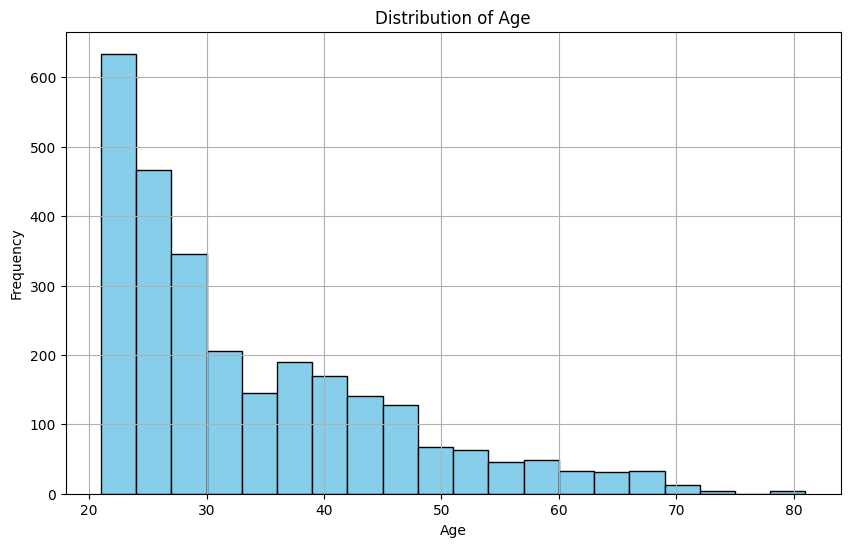

In [59]:
# Create a histogram for the Age column
plt.figure(figsize=(10,6))
plt.hist(df["Age"], bins=20, color='skyblue', edgecolor='black')  # Adjust 'Age' to your actual column name
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


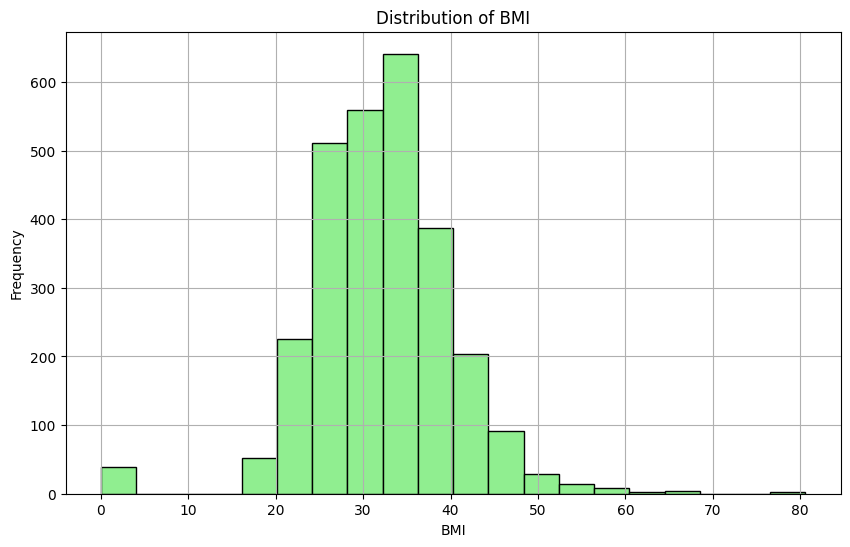

In [60]:
# Create a histogram for the BMI column
plt.figure(figsize=(10,6))
plt.hist(df["BMI"], bins=20, color='lightgreen', edgecolor='black')  # Adjust 'BMI' to your actual column name
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


### 5. Discussion

Do any additional exploration of this data that you think may be interesting and include your code here.  Then go onto Slack and make a post about what you've observed.  Share your observation.  Share your code, if you like.  Share a screenshot of the data or a chart based on the data.

Then comment on at least two other people's observations that they share on Slack.  (Use the reply as thread option in Slack to keep the conversation organized.)

In [61]:
df.dtypes

,0
Id,int64
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,float64
Outcome,int64


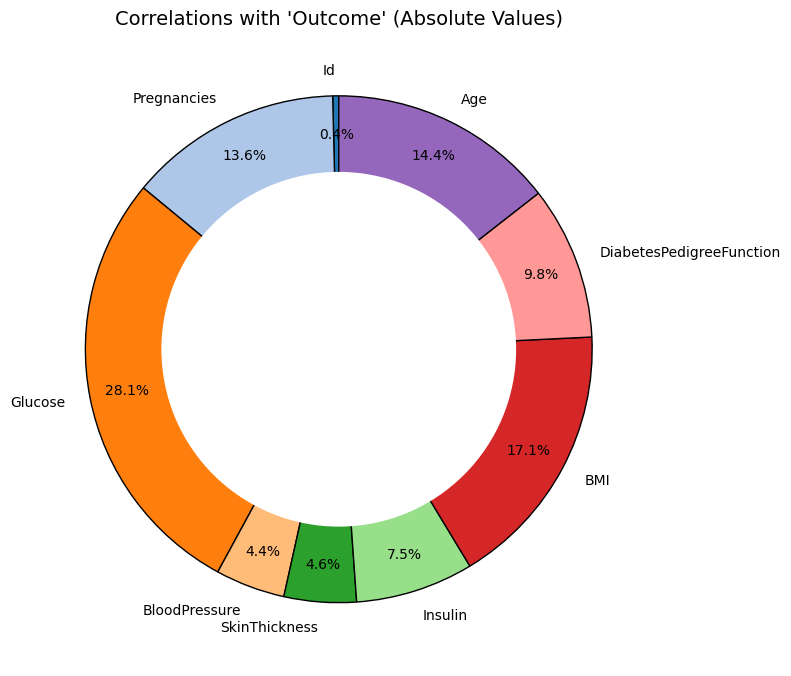

In [62]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Select a specific column to visualize correlations (e.g., 'Outcome')
target_column = 'Outcome'  # Replace with your column of interest
correlations = correlation_matrix[target_column].drop(target_column)  # Exclude self-correlation

# Prepare data for the pie chart
labels = correlations.index
sizes = correlations.abs()  # Use absolute values for magnitude
colors = plt.cm.tab20.colors  # Use a colormap for better visuals

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    pctdistance=0.85,
    wedgeprops={'edgecolor': 'black'}
)

# Add a central circle to make it a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)

# Add a title
plt.title(f"Correlations with '{target_column}' (Absolute Values)", fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()




---



## Submitting Your Work

Submit your work as usual.